In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from keras.datasets import mnist
from sklearn.model_selection import train_test_split
import keras
from keras.models import Sequential, Model
from keras.layers import Dense, MaxPool2D, Conv2D, Dropout, Flatten
from keras.layers import Activation

In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

11490434/11490434 ━━━━━━━━━━━━━━━━━━━━ 0s 0us/step


In [ ]:
train_x, x_validate, train_label, valid_label = train_test_split(x_train, y_train, test_size=0.2, random_state=13)

In [ ]:
batch_size = 64
epochs = 20
num_classes = 10

In [ ]:
model = Sequential()
model.add(Conv2D(32, kernel_size=(3, 3), input_shape=(28, 28, 1), padding="same"))
model.add(Activation('relu'))
model.add(MaxPool2D(2, 2, padding="same"))
model.add(Conv2D(64, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding="same"))
model.add(Conv2D(128, (3, 3), padding="same"))
model.add(Activation('relu'))
model.add(MaxPool2D(pool_size=(2, 2), padding="same"))
model.add(Flatten())
model.add(Dense(128))
model.add(Activation('relu'))
model.add(Dense(num_classes, activation="softmax"))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/convolutional/base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 28, 28, 32)     │           320 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 28, 28, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 14, 14, 32)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 14, 14, 64)     │        18,496 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 14, 14, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 7, 7, 64)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 7, 7, 128)      │        73,856 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 7, 7, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 4, 4, 128)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 2048)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 128)            │       262,272 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 10)             │         1,290 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 356,234 (1.36 MB)

 Trainable params: 356,234 (1.36 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
model.compile(loss=keras.losses.sparse_categorical_crossentropy, optimizer=keras.optimizers.Adam(), metrics=["accuracy"],
)

In [ ]:
model_train = model.fit( train_x,train_label, batch_size=batch_size, epochs=epochs, verbose=1, validation_data=(x_validate, valid_label),)

Epoch 1/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 11s 8ms/step - accuracy: 0.8363 - loss: 1.4961 - val_accuracy: 0.9792 - val_loss: 0.0698
Epoch 2/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9835 - loss: 0.0503 - val_accuracy: 0.9860 - val_loss: 0.0478
Epoch 3/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9883 - loss: 0.0375 - val_accuracy: 0.9815 - val_loss: 0.0633
Epoch 4/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9909 - loss: 0.0294 - val_accuracy: 0.9820 - val_loss: 0.0705
Epoch 5/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 4s 4ms/step - accuracy: 0.9920 - loss: 0.0263 - val_accuracy: 0.9862 - val_loss: 0.0504
Epoch 6/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 6s 5ms/step - accuracy: 0.9921 - loss: 0.0242 - val_accuracy: 0.9862 - val_loss: 0.0507
Epoch 7/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9937 - loss: 0.0208 - val_accuracy: 0.9868 - val_loss: 0.0519
Epoch 8/20
750/750 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.9938 - loss: 0.0201 - val_accuracy: 0

In [ ]:
test_eval = model.evaluate(x_test, y_test, verbose=0)
print(" test loss:", test_eval[0])
print(" test accuracy:", test_eval[1])

 test loss: 0.0772683322429657
 test accuracy: 0.9876000285148621


In [ ]:
accuracy = model_train.history["accuracy"]
print(accuracy)

[0.9355416893959045, 0.9835208058357239, 0.9872499704360962, 0.989270806312561, 0.9911041855812073, 0.9918333292007446, 0.9929166436195374, 0.9931874871253967, 0.9934375286102295, 0.9936875104904175, 0.9943749904632568, 0.9947916865348816, 0.9947291612625122, 0.9961249828338623, 0.9956250190734863, 0.9967291951179504, 0.9957708120346069, 0.9958541393280029, 0.9963958263397217, 0.9976666569709778]


In [ ]:
val_accuracy=model_train.history["val_accuracy"]
val_accuracy

[0.9791666865348816,
 0.9860000014305115,
 0.9815000295639038,
 0.9819999933242798,
 0.9861666560173035,
 0.9862499833106995,
 0.9868333339691162,
 0.987416684627533,
 0.9848333597183228,
 0.9869166612625122,
 0.9871666431427002,
 0.9888333082199097,
 0.9880833625793457,
 0.9865000247955322,
 0.9855833053588867,
 0.987583339214325,
 0.9855833053588867,
 0.9879166483879089,
 0.9890833497047424,
 0.9881666898727417]

In [ ]:
loss=model_train.history["loss"]
loss

[0.3877333104610443,
 0.05196450278162956,
 0.039839982986450195,
 0.03353867679834366,
 0.029630007222294807,
 0.026947423815727234,
 0.023306047543883324,
 0.022233977913856506,
 0.020882464945316315,
 0.01984892226755619,
 0.017821772024035454,
 0.015906095504760742,
 0.017628423869609833,
 0.012861923314630985,
 0.01587253250181675,
 0.010600143112242222,
 0.01432100310921669,
 0.013766559772193432,
 0.012816858477890491,
 0.00863625481724739]

In [ ]:
val_loss=model_train.history["val_loss"]
val_loss

[0.06982627511024475,
 0.04778660461306572,
 0.06329084932804108,
 0.07049236446619034,
 0.05043995752930641,
 0.05072781816124916,
 0.05188866704702377,
 0.05087961256504059,
 0.05507362261414528,
 0.059703439474105835,
 0.056881364434957504,
 0.06216844543814659,
 0.053230199962854385,
 0.0618886761367321,
 0.06384216248989105,
 0.07764802128076553,
 0.08039513975381851,
 0.06824161112308502,
 0.06309743970632553,
 0.07175935059785843]

<Figure size 640x480 with 0 Axes>

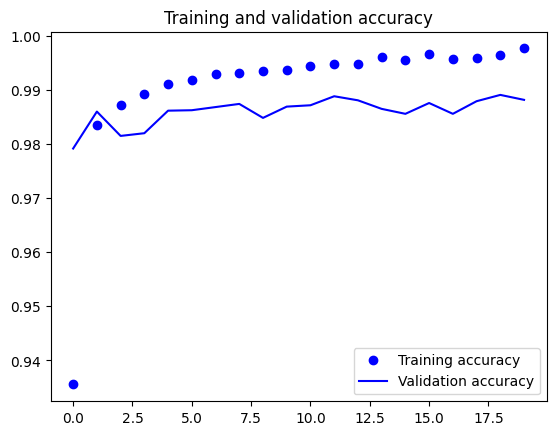

<Figure size 640x480 with 0 Axes>

In [ ]:
plt.plot(epochs, accuracy, "bo", label="Training accuracy")
plt.plot(epochs, val_accuracy, "b", label="Validation accuracy")
plt.title(f"Training and validation accuracy")
plt.legend()
plt.figure()

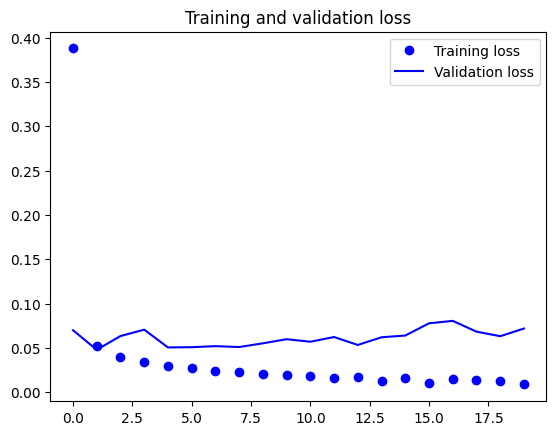

In [ ]:
plt.plot(epochs, loss, "bo", label="Training loss")
plt.plot(epochs, val_loss, "b", label="Validation loss")
plt.title(f"Training and validation loss")
plt.legend()
plt.show()

In [ ]:
index = 32

In [ ]:
image = x_test[index]
true_label = y_test[index]

In [ ]:
import matplotlib.pyplot as plt

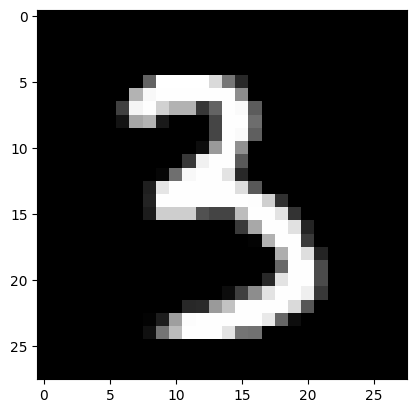

In [ ]:
plt.imshow(image, cmap='gray')
plt.show()

In [ ]:
prediction = model.predict(image.reshape(1, 28, 28, 1))
predicted_label = prediction.argmax()
print(prediction)

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 32ms/step
[[1.5329347e-32 8.2665138e-23 2.1385087e-23 1.0000000e+00 1.1225705e-27
  2.1056220e-13 1.8254280e-22 8.0843980e-21 6.7986731e-18 2.6765198e-20]]


In [ ]:
predicted_label

np.int64(3)